Convolutional Neural Network (CNN) en CIFAR.

In [7]:
!wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
!tar -xzvf data.tar.gz
!rm data.tar.gz

--2018-04-27 18:34:22--  http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
Resolving octopus.inf.utfsm.cl (octopus.inf.utfsm.cl)... 200.1.19.31
Connecting to octopus.inf.utfsm.cl (octopus.inf.utfsm.cl)|200.1.19.31|:80... failed: Connection refused.
tar (child): data.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
rm: cannot remove 'data.tar.gz': No such file or directory


In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


---
> **Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida: (i) dos matrices Xtr, Ytr, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices Xt , Yt , correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices Xv,Yv, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.**

---



In [2]:
import matplotlib.pyplot as plt
def plot_data(loss,val_loss,acc,val_acc):
    plt.close('all')

    f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    axarr[0].set_title('MSE vs Epoch')
    axarr[0].plot(loss)
    axarr[0].plot(val_loss)
    axarr[0].set_xlabel('epoch')
    axarr[0].set_ylabel('mse')
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[1].set_title('Acc vs Epoch')
    axarr[1].plot(acc)
    axarr[1].plot(val_acc)
    axarr[1].set_xlabel('epoch')
    axarr[1].set_ylabel('acc')
    #plt.ylim(ymin=0, ymax=1)

    axarr[1].legend(['entrenamiento', 'prueba'], loc='upper right')
    axarr[0].legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

In [3]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import _pickle as pickle
import numpy as np
import os
from imageio import imread
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
num_classes = len(label_names)

from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

In [4]:
x_train = X_train/255.0
x_test = X_test/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.09, random_state=42)

In [13]:
#x_train = X_train.reshape((X_train.shape[0],3,32,32))
#x_train = X_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
#x_test= X_test.reshape((X_test.shape[0],3,32,32))
#x_test= X_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

**C)** arquitectura C×P×C×P×F×F. Para ambas capas convolucionales utilice 64 filtros de 3×3 y funciones de activación ReLu. Para las capas de pooling utilice filtros de 2×2 con stride 2. Para la capa MLP escondida use 512 neuronas. 

In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [8]:

opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [14]:
batch_size = 32
epochs = 25
history = model.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 11s 240us/step - loss: 1.9354 - acc: 0.3092 - val_loss: 1.6920 - val_acc: 0.3904
Epoch 2/25
45500/45500 [==============================] - 11s 236us/step - loss: 1.5279 - acc: 0.4572 - val_loss: 1.4229 - val_acc: 0.4973
Epoch 3/25
45500/45500 [==============================] - 11s 246us/step - loss: 1.3560 - acc: 0.5172 - val_loss: 1.3117 - val_acc: 0.5271
Epoch 4/25
45500/45500 [==============================] - 11s 243us/step - loss: 1.2479 - acc: 0.5573 - val_loss: 1.2215 - val_acc: 0.5653
Epoch 5/25
45500/45500 [==============================] - 11s 245us/step - loss: 1.1401 - acc: 0.6016 - val_loss: 1.1796 - val_acc: 0.5880
Epoch 6/25
45500/45500 [==============================] - 11s 244us/step - loss: 1.0928 - acc: 0.6174 - val_loss: 1.1471 - val_acc: 0.5951
Epoch 7/25
45500/45500 [==============================] - 11s 245us/step - loss: 1.0468 - acc: 0.6366 - val_loss: 1.1

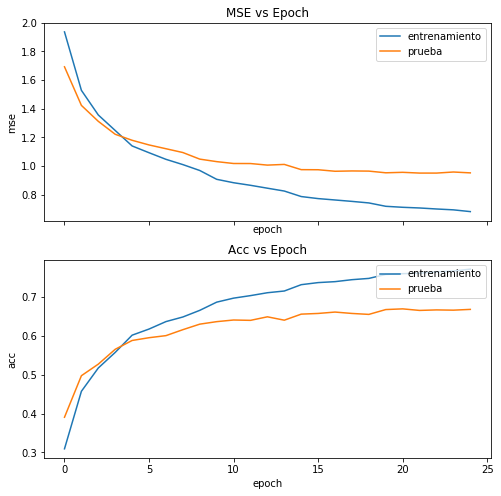

In [18]:
plot_data(history.history['loss'],history.history['val_loss'],history.history['acc'],history.history['val_acc'])

In [6]:
#E Usar el modelo hecho en C pero con rms prop
opt = rmsprop(lr=0.001, decay=1e-6)

batch_size = 75
epochs = 25
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


NameError: name 'lrate' is not defined

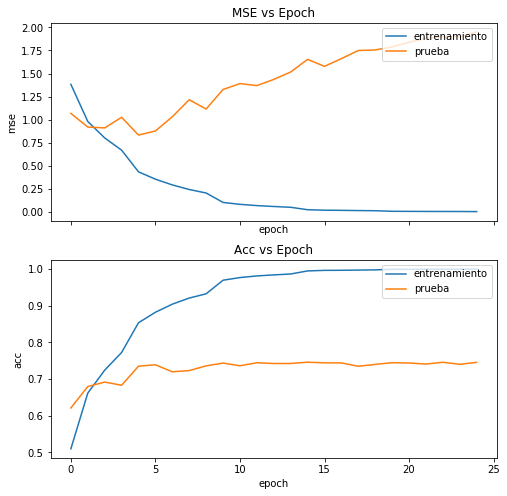

In [20]:
plot_data(history1.history['loss'],history1.history['val_loss'],history1.history['acc'],history1.history['val_acc'])

**F)**

In [10]:
#Shallow network
nc = 2#convolutional filter size
epochs = 15
history_d = []
for nc in [2,3,4,5]:
    print('\n'+'------------- nc = '+str(nc)+'-------------\n')
    model_d = Sequential()
    model_d.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model_d.add(Activation('relu'))
    model_d.add(MaxPooling2D(pool_size=(2, 2)))
    model_d.add(Conv2D(64, (nc, nc), padding='same'))
    model_d.add(Activation('relu'))
    model_d.add(MaxPooling2D(pool_size=(2, 2)))
    model_d.add(Flatten())
    model_d.add(Dense(512))
    model_d.add(Activation('relu'))
    model_d.add(Dense(10))
    model_d.add(Activation('softmax'))
    model_d.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
    history_d.append(model_d.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate]))


------------- nc = 2-------------

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 11s 251us/step - loss: 2.0086 - acc: 0.2808 - val_loss: 1.8075 - val_acc: 0.3602
Epoch 2/15
45500/45500 [==============================] - 11s 244us/step - loss: 1.6321 - acc: 0.4215 - val_loss: 1.5177 - val_acc: 0.4644
Epoch 3/15
45500/45500 [==============================] - 11s 247us/step - loss: 1.4187 - acc: 0.4942 - val_loss: 1.3801 - val_acc: 0.5073
Epoch 4/15
45500/45500 [==============================] - 11s 245us/step - loss: 1.3139 - acc: 0.5341 - val_loss: 1.3051 - val_acc: 0.5284
Epoch 5/15
45500/45500 [==============================] - 11s 248us/step - loss: 1.2128 - acc: 0.5707 - val_loss: 1.2445 - val_acc: 0.5538
Epoch 6/15
45500/45500 [==============================] - 11s 250us/step - loss: 1.1746 - acc: 0.5851 - val_loss: 1.1939 - val_acc: 0.5744
Epoch 7/15
45500/45500 [==============================] - 11s 242us/step - loss: 

45500/45500 [==============================] - 12s 274us/step - loss: 0.7822 - acc: 0.7325 - val_loss: 0.9597 - val_acc: 0.6638
Epoch 13/15
45500/45500 [==============================] - 12s 274us/step - loss: 0.7579 - acc: 0.7417 - val_loss: 0.9614 - val_acc: 0.6649
Epoch 14/15
45500/45500 [==============================] - 13s 276us/step - loss: 0.7359 - acc: 0.7489 - val_loss: 0.9333 - val_acc: 0.6758
Epoch 15/15
45500/45500 [==============================] - 12s 274us/step - loss: 0.6905 - acc: 0.7679 - val_loss: 0.9231 - val_acc: 0.6816


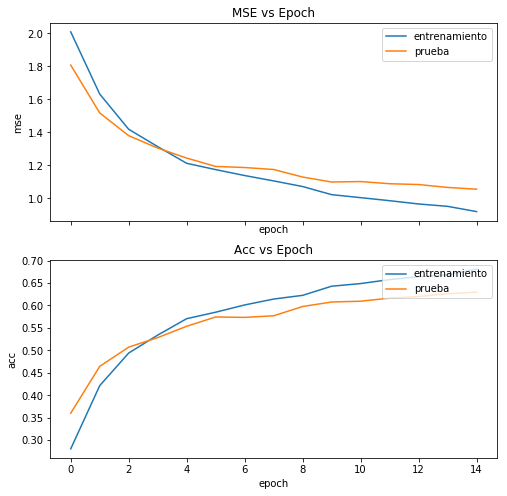

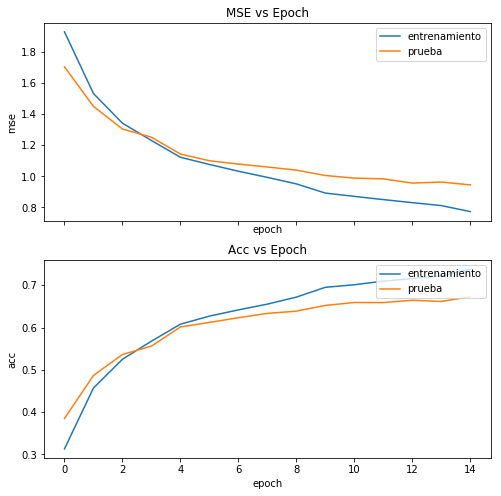

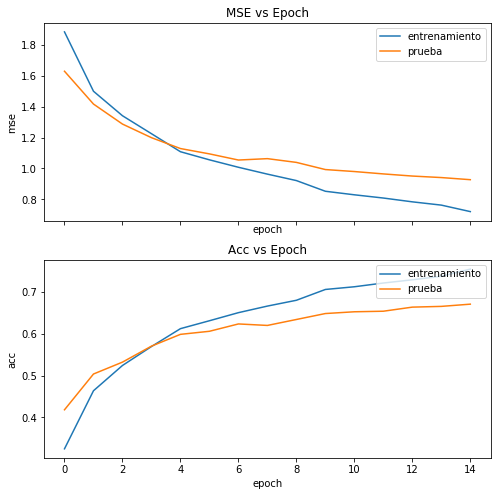

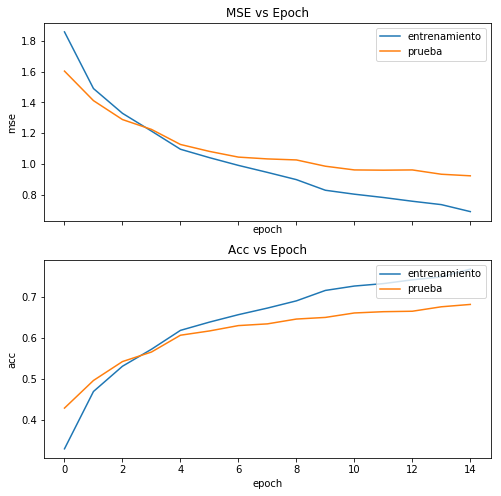

In [12]:
for i in [0,1,2,3]:
    plot_data(history_d[i].history['loss'],history_d[i].history['val_loss'],history_d[i].history['acc'],history_d[i].history['val_acc'])

In [16]:
history_s = []
for nc in [2,3,4,5]:
    print('\n'+'------------- nc = '+str(nc)+'-------------\n')
    model_s = Sequential()
    model_s.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model_s.add(Activation('relu'))
    model_s.add(MaxPooling2D(pool_size=(2, 2)))
    model_s.add(Flatten())
    model_s.add(Dense(512))
    model_s.add(Activation('relu'))
    model_s.add(Dense(10))
    model_s.add(Activation('softmax'))
    model_s.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
    history_s.append(model_s.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate]))


------------- nc = 2-------------

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 15s 319us/step - loss: 1.9049 - acc: 0.3279 - val_loss: 1.7290 - val_acc: 0.3940
Epoch 2/15
45500/45500 [==============================] - 14s 315us/step - loss: 1.6080 - acc: 0.4374 - val_loss: 1.5207 - val_acc: 0.4653
Epoch 3/15
45500/45500 [==============================] - 14s 300us/step - loss: 1.4201 - acc: 0.5014 - val_loss: 1.4100 - val_acc: 0.4942
Epoch 4/15
45500/45500 [==============================] - 14s 311us/step - loss: 1.2947 - acc: 0.5421 - val_loss: 1.3025 - val_acc: 0.5384
Epoch 5/15
45500/45500 [==============================] - 14s 311us/step - loss: 1.2029 - acc: 0.5805 - val_loss: 1.2405 - val_acc: 0.5616
Epoch 6/15
45500/45500 [==============================] - 14s 312us/step - loss: 1.1668 - acc: 0.5931 - val_loss: 1.2181 - val_acc: 0.5798
Epoch 7/15
45500/45500 [==============================] - 14s 311us/step - loss: 

45500/45500 [==============================] - 15s 319us/step - loss: 0.8703 - acc: 0.7022 - val_loss: 1.0371 - val_acc: 0.6304
Epoch 13/15
45500/45500 [==============================] - 14s 317us/step - loss: 0.8495 - acc: 0.7120 - val_loss: 1.0158 - val_acc: 0.6400
Epoch 14/15
45500/45500 [==============================] - 14s 317us/step - loss: 0.8289 - acc: 0.7178 - val_loss: 1.0091 - val_acc: 0.6464
Epoch 15/15
45500/45500 [==============================] - 14s 317us/step - loss: 0.7938 - acc: 0.7332 - val_loss: 0.9992 - val_acc: 0.6456


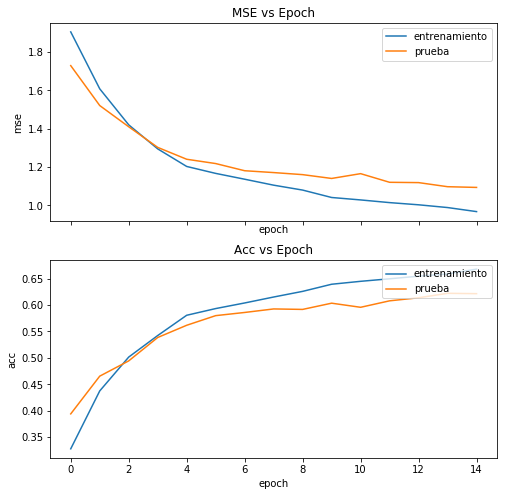

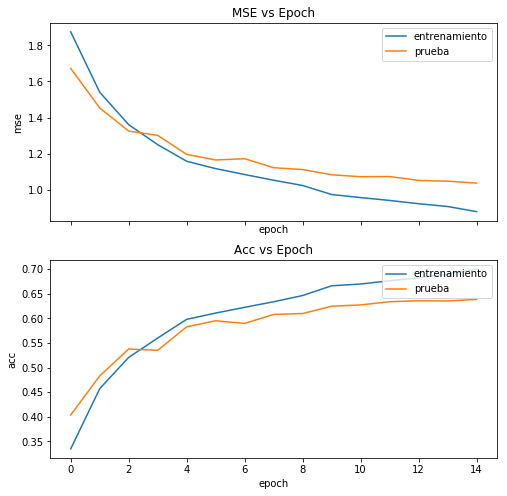

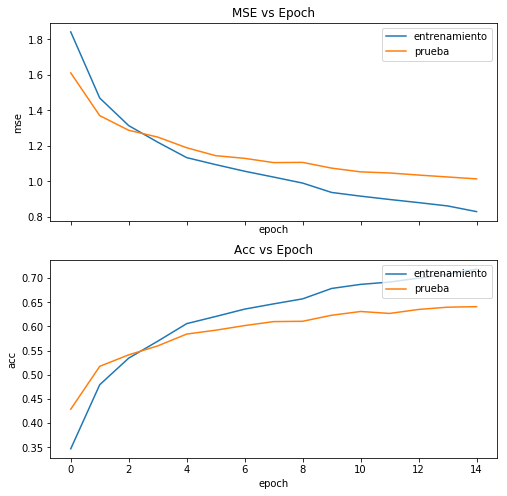

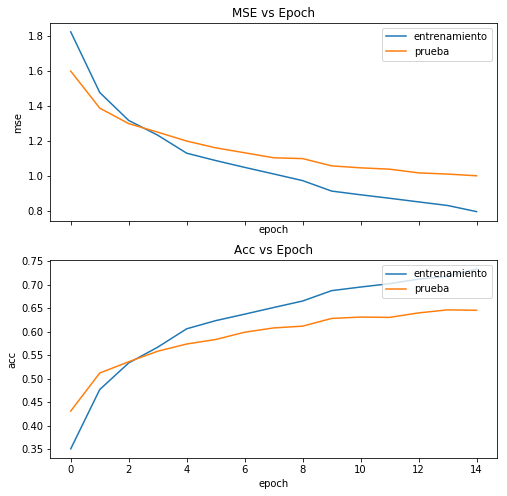

In [17]:
for i in [0,1,2,3]:
    plot_data(history_s[i].history['loss'],history_s[i].history['val_loss'],history_s[i].history['acc'],history_s[i].history['val_acc'])

**G)**

In [26]:
epochs = 25

model4 = Sequential()
#C
model4.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
#C
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
#P
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
#C
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
#C
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
#P
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
#F
model4.add(Dense(512))
model4.add(Activation('relu'))
#F
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history4 = model4.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 17s 383us/step - loss: 1.6850 - acc: 0.3905 - val_loss: 1.4709 - val_acc: 0.4684
Epoch 2/25
45500/45500 [==============================] - 17s 364us/step - loss: 1.3654 - acc: 0.5084 - val_loss: 1.2494 - val_acc: 0.5522
Epoch 3/25
45500/45500 [==============================] - 16s 361us/step - loss: 1.1956 - acc: 0.5772 - val_loss: 1.1164 - val_acc: 0.6007
Epoch 4/25
45500/45500 [==============================] - 17s 365us/step - loss: 1.0725 - acc: 0.6228 - val_loss: 1.1050 - val_acc: 0.6184
Epoch 5/25
45500/45500 [==============================] - 17s 366us/step - loss: 0.9678 - acc: 0.6594 - val_loss: 0.9617 - val_acc: 0.6564
Epoch 6/25
45500/45500 [==============================] - 17s 368us/step - loss: 0.8891 - acc: 0.6880 - val_loss: 0.8565 - val_acc: 0.7009
Epoch 7/25
45500/45500 [==============================] - 17s 365us/step - loss: 0.8189 - acc: 0.7130 - val_loss: 0.8

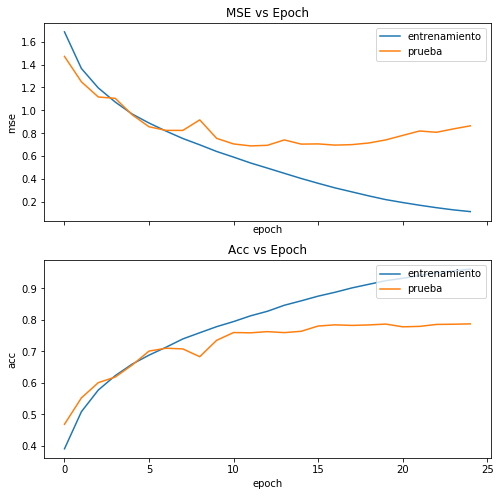

In [28]:
plot_data(history4.history['loss'],history4.history['val_loss'],history4.history['acc'],history4.history['val_acc'])

** H )**

In [27]:

model5 = Sequential()
#C
model5.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C with Stride
model5.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C with Stride
model5.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model5.add(Activation('relu'))

model5.add(Flatten())
#F
model5.add(Dense(512))
model5.add(Activation('relu'))
#F
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history5 = model5.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 18s 398us/step - loss: 1.7061 - acc: 0.3859 - val_loss: 1.4957 - val_acc: 0.4660
Epoch 2/25
45500/45500 [==============================] - 17s 381us/step - loss: 1.3784 - acc: 0.5073 - val_loss: 1.2612 - val_acc: 0.5502
Epoch 3/25
45500/45500 [==============================] - 17s 380us/step - loss: 1.2025 - acc: 0.5729 - val_loss: 1.1330 - val_acc: 0.6013
Epoch 4/25
45500/45500 [==============================] - 18s 385us/step - loss: 1.0639 - acc: 0.6259 - val_loss: 1.1527 - val_acc: 0.5871
Epoch 5/25
45500/45500 [==============================] - 17s 381us/step - loss: 0.9499 - acc: 0.6680 - val_loss: 0.9924 - val_acc: 0.6478
Epoch 6/25
45500/45500 [==============================] - 18s 385us/step - loss: 0.8461 - acc: 0.7047 - val_loss: 0.9812 - val_acc: 0.6469
Epoch 7/25
45500/45500 [==============================] - 18s 385us/step - loss: 0.7498 - acc: 0.7415 - val_loss: 0.9

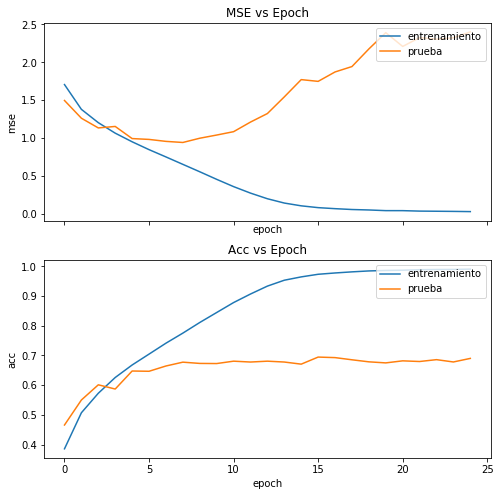

------------------------------


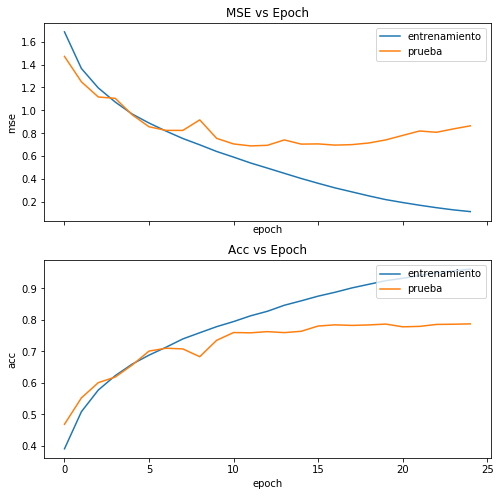

In [30]:
plot_data(history5.history['loss'],history5.history['val_loss'],history5.history['acc'],history5.history['val_acc'])
print('---'*10)
plot_data(history4.history['loss'],history4.history['val_loss'],history4.history['acc'],history4.history['val_acc'])

En comparación de la tecnica de pooling y de strides, se observa que el pooling puede ser reemplazado por strides. En cuanto al modelo con strice se nota overfitting mayor que el modelo con pooling dado a que el primero se ajusta mejor al entrenamiento que el segundo, pero el los datos de validación se nota una diferencia de 2% en contra de este.

** i) **

In [32]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)


In [33]:
model6 = Sequential()
model6.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(10))
model6.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
lrate = LearningRateScheduler(step_decay)
model6.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
train_datagen = model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs,validation_data=(x_val, y_val))

Epoch 1/25
606/606 [==============================] - 14s 23ms/step - loss: 1.0045 - acc: 0.6509 - val_loss: 0.9454 - val_acc: 0.6716
Epoch 2/25
606/606 [==============================] - 11s 17ms/step - loss: 0.9908 - acc: 0.6557 - val_loss: 0.9423 - val_acc: 0.6720
Epoch 3/25
606/606 [==============================] - 11s 18ms/step - loss: 0.9921 - acc: 0.6577 - val_loss: 0.9418 - val_acc: 0.6711
Epoch 4/25
606/606 [==============================] - 11s 18ms/step - loss: 0.9846 - acc: 0.6604 - val_loss: 0.9406 - val_acc: 0.6753
Epoch 5/25
606/606 [==============================] - 11s 17ms/step - loss: 0.9823 - acc: 0.6608 - val_loss: 0.9403 - val_acc: 0.6727
Epoch 6/25
606/606 [==============================] - 11s 18ms/step - loss: 0.9812 - acc: 0.6606 - val_loss: 0.9414 - val_acc: 0.6689
Epoch 7/25
606/606 [==============================] - 11s 18ms/step - loss: 0.9770 - acc: 0.6600 - val_loss: 0.9360 - val_acc: 0.6713
Epoch 8/25
606/606 [==============================] - 11s 17ms

In [19]:
plot_data(train_datagen.history['loss'],train_datagen.history['val_loss'],train_datagen.history['acc'],train_datagen.history['val_acc'])

NameError: name 'train_datagen' is not defined

**j**

In [34]:
epochs = 25
batch_size = 128

model_b = Sequential()
#C
model_b.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_b.add(Activation('relu'))
#C
model_b.add(Conv2D(64, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#P
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))
#C
model_b.add(Conv2D(128, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#C
model_b.add(Conv2D(128, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#P
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))
model_b.add(Flatten())
#F
model_b.add(Dense(512))
model_b.add(Activation('relu'))
#F
model_b.add(Dense(10))
model_b.add(Activation('softmax'))
model_b.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history_b = model_b.fit(x_train, y_train,epochs=epochs,batch_size=batch_size,verbose=0, validation_data=(x_val, y_val),shuffle=True)

In [20]:
plot_data(history_b.history['loss'],history_b.history['val_loss'],history_b.history['acc'],history_b.history['val_acc'])

NameError: name 'history_b' is not defined